# Markovs Chain Character Level

This project is associated with generating text using markov chain at character level.

# Probabilistical Approach

In [63]:
import torch
import torch.nn.functional as F
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
text = open('input.txt', 'r').readlines()

In [3]:
len(text)

40000

In [4]:
X = [x for x in text]

In [5]:
chars = set(list(''.join(X)))
print(chars)

{"'", 'V', 'j', 'v', '3', 'z', 'G', '$', 'u', 'l', 'p', 'e', 'U', 'w', 'h', 'F', 'Y', 's', 'g', 'J', 'A', 'Q', ';', 'x', 'C', 'm', 'I', 'P', 'n', 'd', 'c', 'T', ' ', 'r', '?', 'L', '&', '.', 'b', 'S', 'i', ':', 'k', 'y', 'Z', ',', 'R', 'K', 'E', 'D', 'X', '!', 'o', 't', 'N', '\n', '-', 'a', 'H', 'f', 'M', 'W', 'O', 'q', 'B'}


In [6]:
num_chars = len(set(list(''.join(X))))
num_chars += 1 # for special token
num_chars

66

The text is cleaned. 

Now lets create character index and keep count.

In [25]:
counts = {}
for sample in X:
    s_ = list(sample)
    for ch1, ch2 in zip(s_, s_[1:]):
        bigram = (ch1, ch2)
        counts[bigram] = counts.get(bigram, 0)  + 1

In [26]:
sorted(counts.items(), key = lambda kv: -kv[1])[:5]

[(('e', ' '), 27643),
 ((' ', 't'), 23837),
 (('t', 'h'), 22739),
 (('h', 'e'), 18203),
 (('t', ' '), 16508)]

In [27]:
len(counts)

1351

We have 673 pairs of characters

In [28]:
N = torch.zeros((num_chars, num_chars), dtype=torch.int32)
N.shape

torch.Size([66, 66])

In [29]:
chars = sorted(chars)
print(chars)

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [30]:
chtoi = {ch:i+1 for i, ch in enumerate(chars)}
chtoi['<c>'] = 0
itoch={i:ch for ch, i in chtoi.items()}

In [31]:
print(chtoi)

{'\n': 1, ' ': 2, '!': 3, '$': 4, '&': 5, "'": 6, ',': 7, '-': 8, '.': 9, '3': 10, ':': 11, ';': 12, '?': 13, 'A': 14, 'B': 15, 'C': 16, 'D': 17, 'E': 18, 'F': 19, 'G': 20, 'H': 21, 'I': 22, 'J': 23, 'K': 24, 'L': 25, 'M': 26, 'N': 27, 'O': 28, 'P': 29, 'Q': 30, 'R': 31, 'S': 32, 'T': 33, 'U': 34, 'V': 35, 'W': 36, 'X': 37, 'Y': 38, 'Z': 39, 'a': 40, 'b': 41, 'c': 42, 'd': 43, 'e': 44, 'f': 45, 'g': 46, 'h': 47, 'i': 48, 'j': 49, 'k': 50, 'l': 51, 'm': 52, 'n': 53, 'o': 54, 'p': 55, 'q': 56, 'r': 57, 's': 58, 't': 59, 'u': 60, 'v': 61, 'w': 62, 'x': 63, 'y': 64, 'z': 65, '<c>': 0}


In [32]:
print(itoch)

{1: '\n', 2: ' ', 3: '!', 4: '$', 5: '&', 6: "'", 7: ',', 8: '-', 9: '.', 10: '3', 11: ':', 12: ';', 13: '?', 14: 'A', 15: 'B', 16: 'C', 17: 'D', 18: 'E', 19: 'F', 20: 'G', 21: 'H', 22: 'I', 23: 'J', 24: 'K', 25: 'L', 26: 'M', 27: 'N', 28: 'O', 29: 'P', 30: 'Q', 31: 'R', 32: 'S', 33: 'T', 34: 'U', 35: 'V', 36: 'W', 37: 'X', 38: 'Y', 39: 'Z', 40: 'a', 41: 'b', 42: 'c', 43: 'd', 44: 'e', 45: 'f', 46: 'g', 47: 'h', 48: 'i', 49: 'j', 50: 'k', 51: 'l', 52: 'm', 53: 'n', 54: 'o', 55: 'p', 56: 'q', 57: 'r', 58: 's', 59: 't', 60: 'u', 61: 'v', 62: 'w', 63: 'x', 64: 'y', 65: 'z', 0: '<c>'}


In [33]:
for bigram, count in counts.items():
    ch1, ch2 = bigram
    idx1, idx2 = chtoi[ch1], chtoi[ch2]
    N[idx1, idx2] = count

In [34]:
N = N+1 # model smoothning
P = torch.zeros(N.shape)
for i in range(num_chars):
    p = N[i].float()
    p = p / p.sum()
    p = p.view(1, num_chars)
    P[i] = p

In [35]:
N.shape

torch.Size([66, 66])

In [36]:
P.sum().item()

66.0

In [37]:
g = torch.Generator()

In [38]:
seed_ = g.seed()
seed_

16209544289441862864

In [39]:
g.manual_seed(seed_);

In [40]:
N.float().shape

torch.Size([66, 66])

In [41]:
P.float().shape

torch.Size([66, 66])

In [42]:
char_g = 500
idx = 0
text = ''
for _ in range(char_g):
    p = N[idx].float()
    p = p / p.sum()
    idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    if itoch[idx] == '<d>':
        break
    text += itoch[idx]
print(text)

D petheerd; st ha bryowhapad t n,
OLORD:
uron amaseromod,'d, at; Burathes eecinks pees wigondora pin-
EShesis s, e brod wanoffeele's hy as isthaked, t eale u dooorer thens st theemoteemared we s, yo har:
KI Sourrbrnit!
jud m w, ou f to ys mse nct ckinctteee phthe the I h y tint ldly beff cofull ced d ulisses pedalaloowo t dK:
zolo nengo ho, m  lllle tour s
Filealootshu Illllowioris che he meara pet or ng med ave nn.
xqur mbray,
YO:
!
Bu? ouet ware.
frnoulalcerds st berd qur; hoomee wes luge?
<c>3s


In [43]:
print(f'Loss of the model: {-P.log().mean()}')

Loss of the model: 6.949477672576904


### Conclusion
The model works on just probablities and generates very bad text.

# Single Layer Neural Network Approach

In [45]:
# Trying on first 2 examples

xs = []
ys = []

for sample in X[:2]:
    s_ = list(sample)
    for ch1, ch2 in zip(s_, s_[1:]):
        ix1 = chtoi[ch1]
        ix2 = chtoi[ch2]

        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [46]:
print(f'{xs.shape=}')
print(f'{ys.shape=}')

xs.shape=torch.Size([59])
ys.shape=torch.Size([59])


In [47]:
W = torch.randn((num_chars, num_chars), generator=g, requires_grad=True) 

In [48]:
Xenc = F.one_hot(xs, num_classes=num_chars).float()
logits = Xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [49]:
probs.shape

torch.Size([59, 66])

In [50]:
loss = -probs[torch.arange(xs.shape[0]), ys].log().mean()
print('Loss of the network: ', loss.item())

Loss of the network:  4.421545028686523


In [51]:
W.grad = None
loss.backward()

In [52]:
W.data += -0.1 * W.grad

In [53]:
print(f'{W.shape=}')
print(f'{W.grad.shape=}')

W.shape=torch.Size([66, 66])
W.grad.shape=torch.Size([66, 66])


In [54]:
logits = Xenc @ W
F.cross_entropy(logits, ys)

tensor(4.4196, grad_fn=<NllLossBackward0>)

In [55]:
len(X)

40000

In [56]:
# creating training set

xs = []
ys = []

for sample in X:
    s_ = list(sample)
    for ch1, ch2 in zip(s_, s_[1:]):
        ix1 = chtoi[ch1]
        ix2 = chtoi[ch2]

        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f'{xs.shape=}')
print(f'{ys.shape=}')

xs.shape=torch.Size([1075394])
ys.shape=torch.Size([1075394])


In [57]:
# encoding X

Xenc = F.one_hot(xs, num_classes=num_chars).float()
print(f'{Xenc.shape=}')

Xenc.shape=torch.Size([1075394, 66])


In [58]:
# learning rate -> hyperparameter optimization

lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [59]:
epochs = 100_000
num_examples = xs.shape[0]
W = torch.randn((num_chars, num_chars), generator=g) * 0.1
W.requires_grad = True

lossi = []

In [60]:
# organizing the network

for k in range(epochs):
    ix = torch.randint(0, xs.shape[0], (32,)) # training on 32 examples
    Xenc_ = Xenc[ix]
    
    logits = Xenc_ @ W
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdims=True)
    # loss = -probs[torch.arange(num_examples), ys].log().mean()
    loss = F.cross_entropy(logits, ys[ix]) # this is a faster and better execution of the above 3 lines
    if k == 0:
        print(f'Loss: {loss.item()}')
    W.grad = None
    
    loss.backward()

    lr = 1 if k < epochs // 2 else 0.001
    W.data += -lr * W.grad

    lossi.append(loss.item())

print(f'Loss: {loss.item()}')

Loss: 4.210188388824463
Loss: 2.876445770263672


In [61]:
-torch.tensor(1/28).log()

tensor(3.3322)

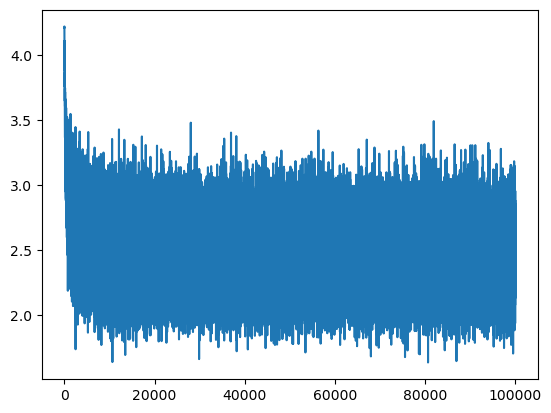

In [64]:
plt.plot(lossi);

In [65]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 5))
# plt.xlabel('Learning Rate exponent')
# plt.ylabel('Loss')
# plt.title('Loss to LRE gragh')
# plt.plot(lri, lossi)
# plt.grid()
# plt.show()

In [66]:
logits.shape

torch.Size([32, 66])

In [68]:
# generating from the network trained

idx = 2
text = ''
for _ in range(500):
    xenc = F.one_hot(torch.tensor([idx]), num_classes=num_chars).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims = True)
    idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    if idx == 0:
        break
    text += itoch[idx]
print(text)

be be he tssot hin yot;
Whe s wavecoullalewarys IS: my t aigngnk war hy,
-d oug owhande RCOCINlkear:
USt aspare f gndedinulloule mand lexNotor w. t mand t tr wa my, aine be'eamyot w ur nir fe y che.
QUShe tuck, I athanouit'e matat hthe turlour, VFoworithisoraw.
ccll.
vel feshofiteate ay
For his tho.
witoriesththy t incor inseyo aterenY it sathence sse,
Youtl in.
ve wesed:
ay aunOueay gubrsoffolll s:
with as; se:
V:
NAPED:
wigh d he Cil d ocouthenghellldod,
cund CHARinmiet y t haim heng, imy, ath


### Conclusion:
The model gets trained on on data throught forward pass and backpropagation, eventually learning something and decreasing the loss.

We can see the model generated some meaningful words. But a lot of words that are generated are not meaningful. A lot of improvement has to be made.

# Multi-Layer Perceptron Approach

In [137]:
# taking context for a length of 3, can as per requirement


context_size = 3
xs, ys = [], []

for x in X[:2]:
    context = [0] * context_size
    
    for i, ch in enumerate(list(x)):
        ix = chtoi[ch]
        xs.append(context)
        ys.append(ix)
        
        print(''.join(itoch[j] for j in context), '-->', itoch[ix])

        context = context[1:] + [ix] # cropping and appending context

xs = torch.tensor(xs)
ys = torch.tensor(ys)

<c><c><c> --> F
<c><c>F --> i
<c>Fi --> r
Fir --> s
irs --> t
rst -->  
st  --> C
t C --> i
 Ci --> t
Cit --> i
iti --> z
tiz --> e
ize --> n
zen --> :
en: --> 

<c><c><c> --> B
<c><c>B --> e
<c>Be --> f
Bef --> o
efo --> r
for --> e
ore -->  
re  --> w
e w --> e
 we -->  
we  --> p
e p --> r
 pr --> o
pro --> c
roc --> e
oce --> e
cee --> d
eed -->  
ed  --> a
d a --> n
 an --> y
any -->  
ny  --> f
y f --> u
 fu --> r
fur --> t
urt --> h
rth --> e
the --> r
her --> ,
er, -->  
r,  --> h
, h --> e
 he --> a
hea --> r
ear -->  
ar  --> m
r m --> e
 me -->  
me  --> s
e s --> p
 sp --> e
spe --> a
pea --> k
eak --> .
ak. --> 



In [70]:
print(f'{xs.shape=}')
print(f'{ys.shape=}')

xs.shape=torch.Size([63, 3])
ys.shape=torch.Size([63])


In [71]:
xs[:10]

tensor([[ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 48],
        [19, 48, 57],
        [48, 57, 58],
        [57, 58, 59],
        [58, 59,  2],
        [59,  2, 16],
        [ 2, 16, 48],
        [16, 48, 59]])

In [72]:
ys[:10]

tensor([19, 48, 57, 58, 59,  2, 16, 48, 59, 48])

In [74]:
# a 3 layer nn consisting of:  a embedding layer, 2 hidden layers, and output layer

emb_dim = 2
C = torch.randn((num_chars, emb_dim))
W1 = torch.randn((context_size * emb_dim, 100)) 
b1 = torch.randn(100) 
W2 = torch.randn((W1.shape[1], num_chars)) 
b2 = torch.randn(num_chars)

In [75]:
# forward prop

h_pre = C[xs].view(-1, context_size * emb_dim)
h = torch.tanh(h_pre @ W1 + b1)
logits = h @ W2 + b2

In [76]:
# loss

loss = F.cross_entropy(logits, ys)
loss

tensor(21.2951)

In [95]:
chtoi = {ch:i+1 for i, ch in enumerate(chars)}
chtoi['<c>'] = 0
itoch={i:ch for ch, i in chtoi.items()}

In [138]:
#loading full dataset

context_size = 3
xs, ys = [], []

for x in X:
    context = [0] * context_size
    
    for i, ch in enumerate(list(x)):
        ix = chtoi[ch]
        xs.append(context)
        ys.append(ix)

        context = context[1:] + [ix] # cropping and appending context

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f'{xs.shape=}')
print(f'{ys.shape=}')

xs.shape=torch.Size([1115394, 3])
ys.shape=torch.Size([1115394])


In [139]:
# train, dev, test split

xs_train, xs_rest, ys_train, ys_rest = train_test_split(xs, ys, test_size = 0.2, random_state = 42)
xs_dev, xs_test, ys_dev, ys_test = train_test_split(xs_rest, ys_rest, test_size = 0.5, random_state = 42)


In [140]:
print(f'{xs_train.shape=}')
print(f'{xs_dev.shape=}')
print(f'{xs_test.shape=}')
print('---')
print(f'{ys_train.shape=}')
print(f'{ys_dev.shape=}')
print(f'{ys_test.shape=}')

xs_train.shape=torch.Size([892315, 3])
xs_dev.shape=torch.Size([111539, 3])
xs_test.shape=torch.Size([111540, 3])
---
ys_train.shape=torch.Size([892315])
ys_dev.shape=torch.Size([111539])
ys_test.shape=torch.Size([111540])


In [146]:
# organinizing the code

emb_dim = 5
n_hidden = 200

C = torch.randn((num_chars, emb_dim))
W1 = torch.randn((context_size * emb_dim, n_hidden)) * (5/3) / ((context_size * emb_dim) ** 0.5)
b1 = torch.randn(n_hidden) * 0.01 
W2 = torch.randn((n_hidden, num_chars)) * 0.1
b2 = torch.randn(num_chars) * 0

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [147]:
print(f'Parameters: {sum(p.nelement() for p in parameters)}')

Parameters: 16796


In [148]:
# learning rate -> hyperparameter optimization

lre = torch.linspace(-4, 0, 1000) # set this to no. of epochs
lrs = 10 ** lre
lri = []
lossi = []

In [159]:
epochs = 200000

for k in range(epochs):
    # forward
    ix = torch.randint(0, xs_train.shape[0], (32,))
    emb_ = C[xs_train[ix]].view(-1, context_size * emb_dim)
    h_pre = emb_ @ W1 + b1
    h = torch.tanh(h_pre)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, ys[ix])
    # print(loss.item())
    if k == 0:
        print(f'{loss.item()=}')

    #backward
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[k]
    lr = 0.17 if k < epochs // 2 else 0.017
    #update
    for p in parameters:
        p.data += -lr * p.grad

    #stats
    # lri.append(lre[k % 1000])
    lossi.append(loss.item())
print(f'{loss.item()=}')

loss.item()=3.3515260219573975
loss.item()=3.342540979385376


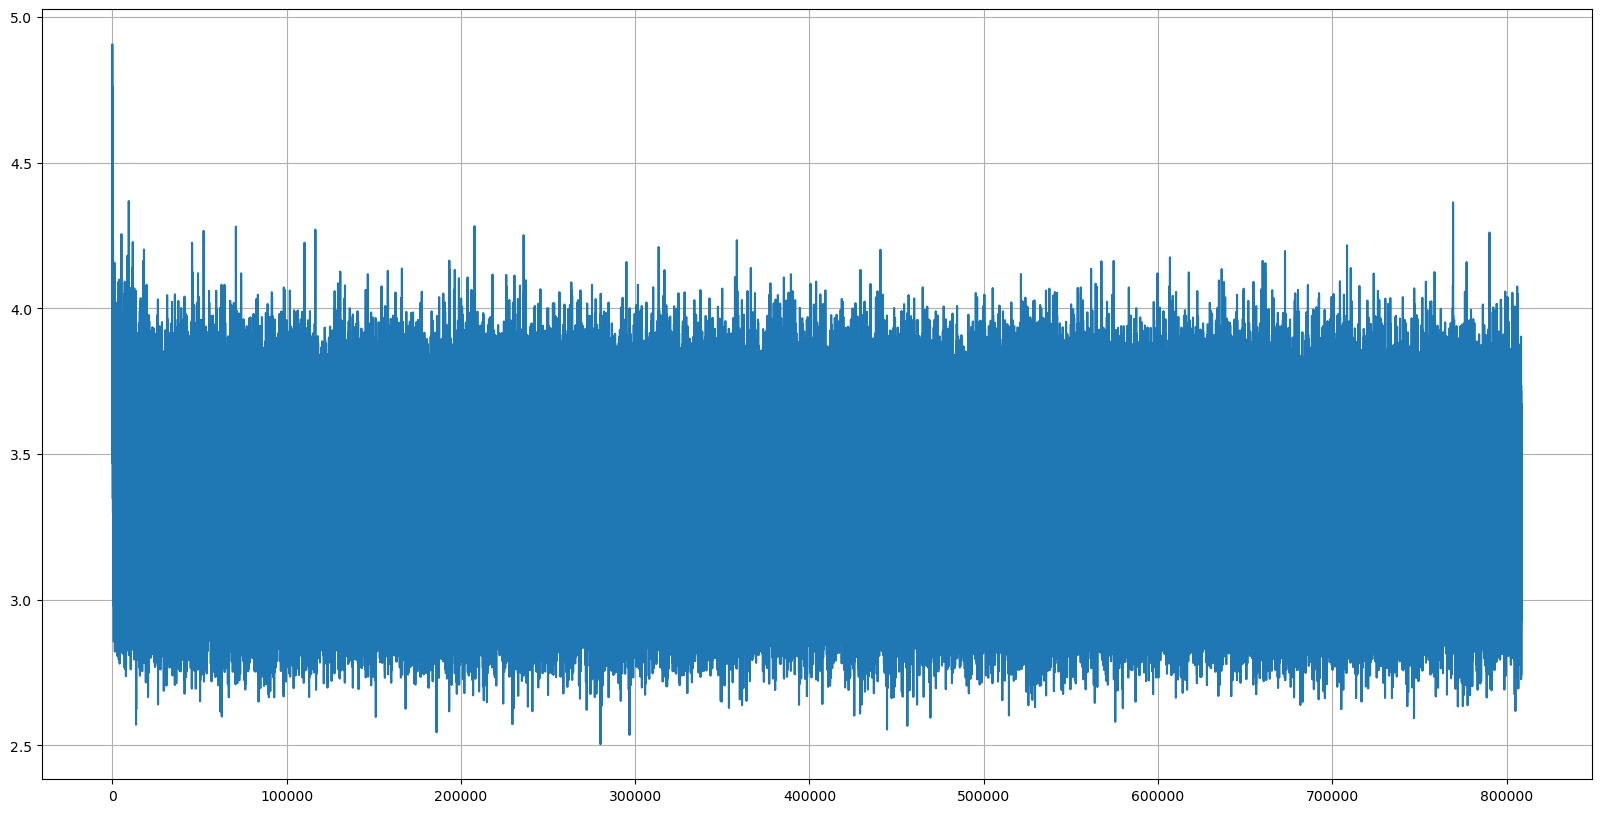

In [160]:
plt.figure(figsize=(20,10))
plt.grid('micro')
plt.plot(lossi);

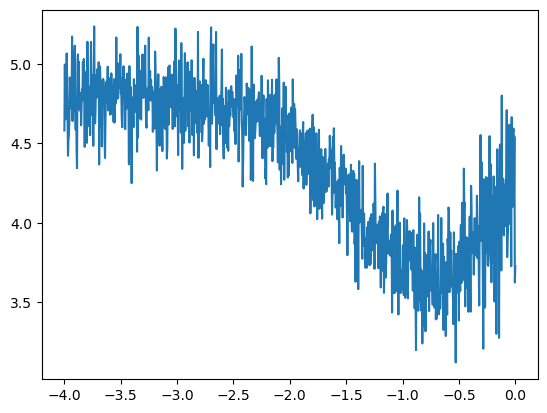

In [127]:
# plt.plot(list(lri), list(lossi));
# to plot this, uncomment learning_rate code block along with the optimization marked code 

In [164]:
#dev loss

with torch.no_grad():
    emb = C[xs_dev].view(-1, context_size * emb_dim)
    h_pre = emb @ W1 + b1 
    h = torch.tanh(h_pre)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, ys_dev)
    print('Loss: ',loss.item())

Loss:  3.312758207321167


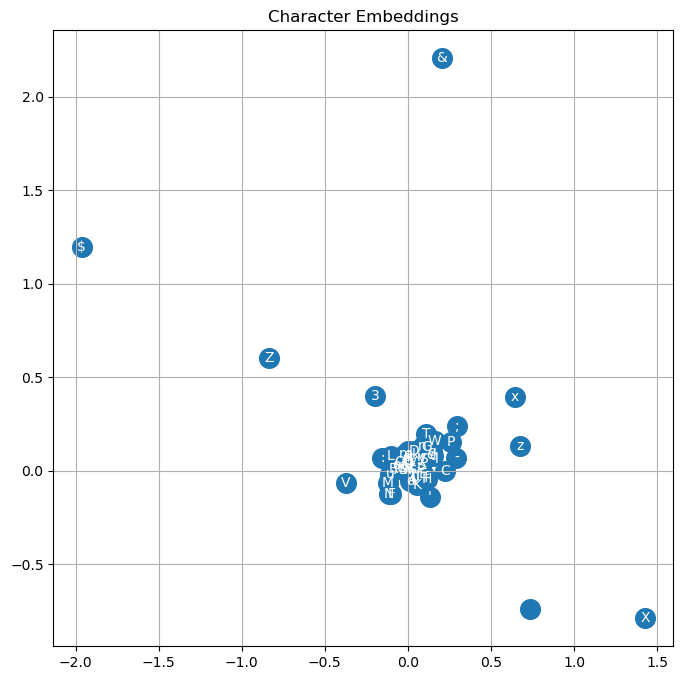

In [166]:
plt.figure(figsize=(8,8))
plt.title('Character Embeddings')
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itoch[i], ha='center', va='center', color='white')
plt.grid('micro');

In [170]:
# sampling from the model

output = []
word = 'IET'
context = [chtoi[ch] for ch in word]

for _ in range(500):
    emb = C[torch.tensor([context])].view(1, -1)
    h = torch.tanh(emb @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    output.append(ix)

print(word, ' ',''.join(itoch[i] for i in output))

IET   So TbykpnA hon t,na etyrt sihyeWemvau omaewA,
gsatByunua'.ny art  bhykfblwr  knnr y t :hmohFcas  mumuhasitfa: h,togAtie anouagat:tn;o O
 Tho A tpneaaclue.tesIee
b
hcgArrrotf  h dar hfu wd,YRcetnltdoroa Nr hnsheie 'ge k o:o s.,oug weaT tt  Iehe :nRlWl!nea hff:tf.r
Sye nti ldogdpw
tue atrsarnuntnnebrlTa tWfs:y 
I nonerDe urottnnI hrV e ,hs kHiaete  nt
iiapadr,elst beevsloOhilntud cegt'i  Mr h<c>h.o,, wtd iatii fawe't;ae;hsn:yusrtsag dei  rn tTya cIs E
r 
pfew
 ateoVe :h  ia
g
ts o soiue
nSnh nehe,lo


### Conclusion

Not a good network. Much more improvements need to be done.